In [1]:
# ------------------------------------------------------------ #
#  Version    : 0.2    							               #
#  Created On : 23-Jun-2024 19:04                              #
#  Created By : Nikit Gokhale                                  #
#  Notes      : Notebook to get insights from the Driver Stats #
#               sample data                                    #
# ------------------------------------------------------------ #

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Overview

This dataset included information related to driver telematics which gives information about premium charged on a driver based on all the telematics around driver. This data contains aggregated information of 335 drivers along with their personal information in addition to the type of car they drive, distances travelled, driving score, speeding events, and risk events.

Information Related to each column:
1. **Policy Number**: Unique policy identification number related to each individual driver
2. **Inception Date**: Starting date of a policy
3. **Months since Inception**: Number of months since the policy has started.
4. **Gender**: Gender information for each driver
5. **Age**: Age information for each driver
6. **Vehicle**: Type of Vehicle each driver drives
7. **Postcode**: Postal address of each driver
8. **Premium Charged**: Amount charged for each policy
9. **Distance**: Total distance travelled by each individual driver
10. **Journeys**: Total number of trips a driver has made
11. **Overall Risk %**: Overall driving risk associated with a driver
12. **High Risk Event**: Number of high risking event a driver has been in
13. **High Risk Event%**: Percentage of high risk event a driver has been in
14. **Medium Risk Event**: Number of medium risking event a driver has been in
15. **Medium Risk Event%**: Percentage of medium risk event a driver has been in
16. **Speeding Events**: Number of speeding events a driver has been in
17. **Speeding Events per Mile**: Number of speeding events per mile a driver has being in
18. **Driver Score**: Overall driver score associated with each driver

### Loading Dataset

In [3]:
# Load the data
df = pd.read_csv("/Users/nikit/Documents/GitHub/allianz_data_assesment/dataset/driver_telematics/driver_stats_sample.csv")

In [4]:
# Basic information of the entries in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Policy Number           335 non-null    object 
 1   Inception Date          335 non-null    object 
 2   Months since Inception  335 non-null    int64  
 3   Gender                  335 non-null    object 
 4   Age                     335 non-null    int64  
 5   Vehicle                 335 non-null    object 
 6   Postcode                335 non-null    object 
 7   Premium Charged         335 non-null    float64
 8   Distance                335 non-null    object 
 9   Journeys                335 non-null    object 
 10  Overall Risk %          242 non-null    object 
 11  High Risk Event         335 non-null    int64  
 12  High Risk Event%        150 non-null    object 
 13  Medium Risk Event       335 non-null    int64  
 14  Medium Risk Event%      237 non-null    ob

### Data Preprocessing

In [5]:
# Change the 'Inception Date' type from 'object' to 'datetime'
df['Inception Date'] = pd.to_datetime(df['Inception Date'])

In [6]:
# Convert columns containing '%' sign at the end, into float (numeric) values
# Columns of interest are 'Overall Risk %', 'High Risk event %' and 'Medium Risk Event %'
df['Overall Risk %'] = pd.to_numeric(df['Overall Risk %'].str.rstrip('%'), errors='coerce')
df['High Risk Event%'] = pd.to_numeric(df['High Risk Event%'].str.rstrip('%'), errors='coerce')
df['Medium Risk Event%'] = pd.to_numeric(df['Medium Risk Event%'].str.rstrip('%'), errors='coerce')

In [7]:
# Convert columns containing ',' in their numeric values into integer values
# Columns of interest are 'Distance', 'Journeys' and 'Speeding Events'
df['Distance'] = pd.to_numeric(df['Distance'].str.replace(',', ''), errors='coerce')
df['Journeys'] = pd.to_numeric(df['Journeys'].str.replace(',', ''), errors='coerce')
df['Speeding Events'] = pd.to_numeric(df['Speeding Events'].str.replace(',', ''), errors='coerce')


In [8]:
df

,Policy Number,Inception Date,Months since Inception,Gender,Age,Vehicle,Postcode,Premium Charged,Distance,Journeys,Overall Risk %,High Risk Event,High Risk Event%,Medium Risk Event,Medium Risk Event%,Speeding Events,SpeedingEventsPerMile,DriverScore
0,XQ22667078,2013-03-15,11,M,19,Renault,HD3 3NZ,3075.49,4905,794,3.15,4,0.50,21,2.64,1400,0.29,92.22
1,XQ22667079,2013-03-23,11,M,19,VW,WN7 2LZ,2724.89,1134,146,0.68,0,NaN,1,0.68,96,0.08,97.71
2,XQ22667080,2013-03-20,11,M,21,Land Rover,NN17 5EG,1268.11,4794,831,11.31,9,1.08,85,10.23,1746,0.36,87.91
3,XQ22667081,2013-03-26,11,M,18,Renault,B94 5BS,3088.35,5298,798,3.51,5,0.63,23,2.88,1080,0.20,93.85
4,XQ22667082,2013-04-03,11,M,18,VW,NN18 9DJ,0.00,5847,1679,1.31,0,NaN,22,1.31,1710,0.29,94.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,XQ22667458,2013-12-20,2,M,18,Renault,TW1 1PZ,1775.13,42,12,NaN,0,NaN,0,NaN,2,0.05,99.10
331,XQ22667459,2013-12-23,2,M,18,VW,RM11 3AJ,1760.30,408,84,NaN,0,NaN,0,NaN,72,0.18,95.40
332,XQ22667465,2013-12-23,2,F,17,Ford,PR2 9FJ,1511.99,88,22,NaN,0,NaN,0,NaN,11,0.12,97.19
333,XQ22667475,2013-12-27,2,F,17,Ford,SK8 4AN,1915.84,1,2,NaN,0,NaN,0,NaN,0,0.00,100.00


In [9]:
# Basic statistics
df.describe()

,Inception Date,Months since Inception,Age,Premium Charged,Distance,Journeys,Overall Risk %,High Risk Event,High Risk Event%,Medium Risk Event,Medium Risk Event%,Speeding Events,SpeedingEventsPerMile,DriverScore
count,335,335.000000,335.000000,335.000000,335.000000,335.000000,242.000000,335.000000,150.000000,335.000000,237.000000,335.000000,335.000000,335.000000
mean,2013-09-03 04:43:42.089552128,5.764179,17.994030,1656.943104,1957.653731,358.680597,5.144174,2.510448,1.879400,10.173134,4.063165,380.182090,0.190896,94.193970
min,2013-03-15 00:00:00,2.000000,16.000000,0.000000,1.000000,2.000000,0.170000,0.000000,0.080000,0.000000,0.170000,0.000000,0.000000,62.360000
25%,2013-07-04 00:00:00,4.000000,17.000000,1345.255000,561.000000,102.500000,1.212500,0.000000,0.372500,0.000000,1.060000,55.000000,0.090000,92.095000
50%,2013-09-04 00:00:00,6.000000,17.000000,1588.050000,1396.000000,249.000000,2.900000,0.000000,0.700000,3.000000,2.630000,217.000000,0.170000,95.110000
75%,2013-10-31 00:00:00,8.000000,19.000000,1987.695000,2997.000000,478.500000,7.015000,2.000000,1.785000,13.000000,5.810000,547.000000,0.260000,97.715000
max,2013-12-28 00:00:00,11.000000,23.000000,4348.010000,12227.000000,1900.000000,44.440000,49.000000,28.650000,115.000000,27.500000,2439.000000,0.930000,100.000000
std,NaN,2.209377,1.528167,835.042436,1826.932590,349.721852,6.441981,6.017866,3.334619,16.725501,4.409071,445.253799,0.138799,4.972439


### Distribution Analysis

#### Driver Score Distribution
The driver scores range from 62.36 to 100, with a majority of drivers scoring above 90. This indicates that most drivers in the sample exhibit relatively safe driving behaviors.

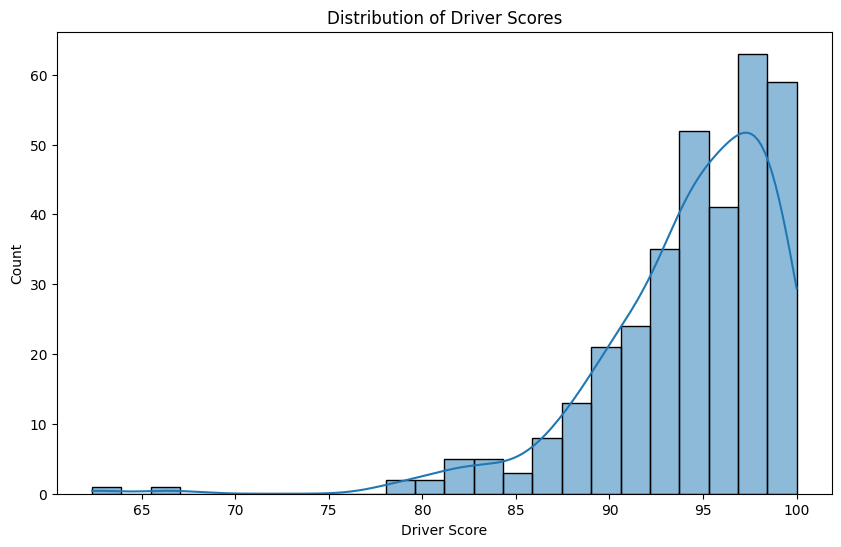

In [10]:
# Driver's Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['DriverScore'], kde=True)
plt.title('Distribution of Driver Scores')
plt.xlabel('Driver Score')
plt.ylabel('Count')
plt.show()

#### Premium Charged Distribution
The premium range from 0 to more than 4000, with a majority of drivers having premium in the range of 1000 to 3000. This indicates that most drivers are charged 0 for premiums, which might be because of some special promotions or offers and others are charged considering all the other aspects.

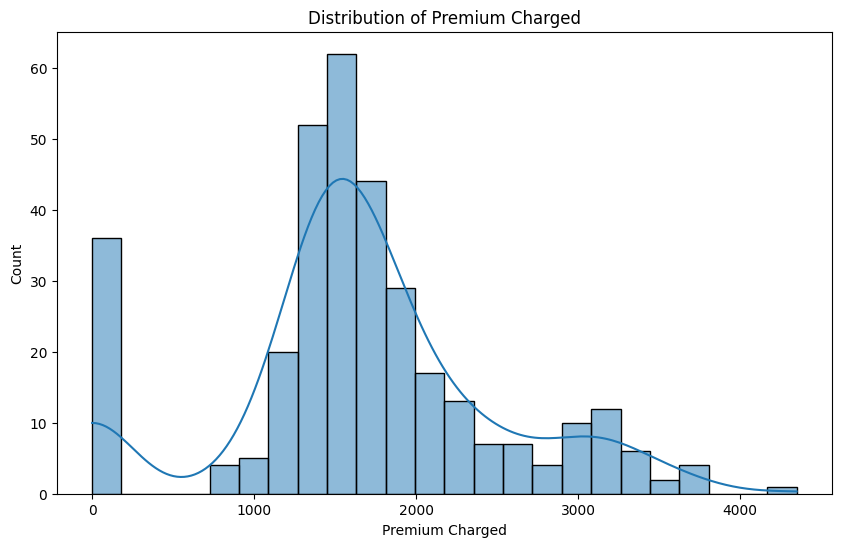

In [11]:
# Distribution of Permiums charged
plt.figure(figsize=(10, 6))
sns.histplot(df['Premium Charged'], kde=True)
plt.title("Distribution of Premium Charged")
plt.xlabel('Premium Charged')
plt.ylabel('Count')
plt.show()

#### Distance and Journey Distribution
The distance travelled distribution indicates that most of the drivers have not travelled more than 6000 miles with the journeys or trips being below 1000.
If we check the average distribution of the distances travelled per trip mostly it ranges from 3 to 10 miles per trip, which shows the nature of the trips (e.g., frequent short trips vs. occasional long trips).
This can help build a comprehensive picture of driving behaviour.

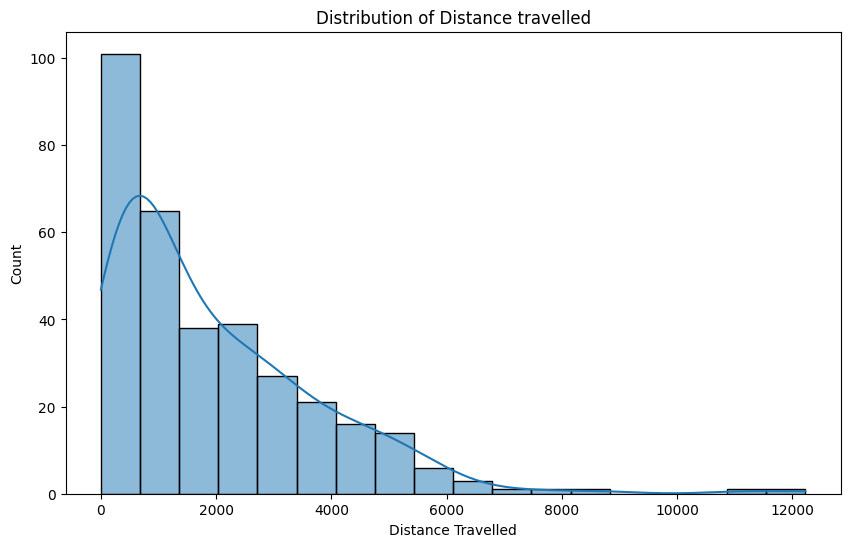

In [12]:
# Distribution of Distance travelled
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance'], kde=True)
plt.title('Distribution of Distance travelled')
plt.xlabel('Distance Travelled')
plt.ylabel('Count')
plt.show()

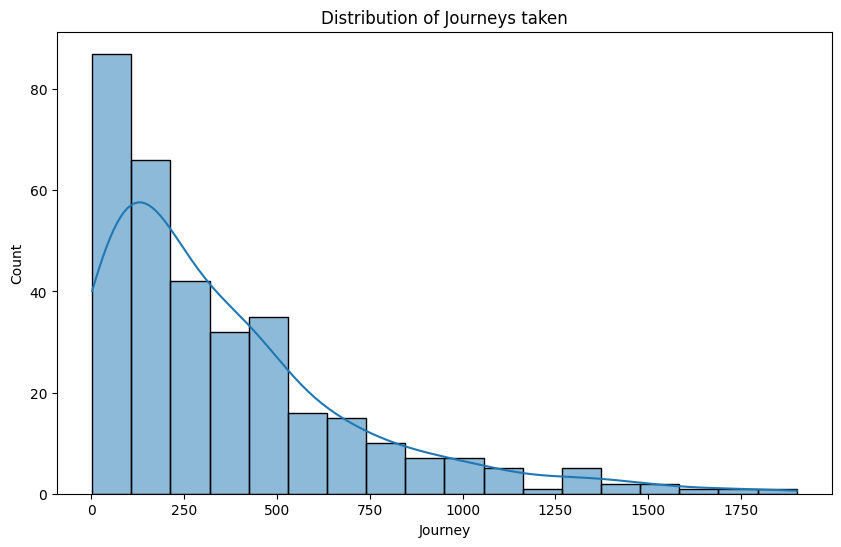

In [13]:
# Distribution of Journeys taken
plt.figure(figsize=(10, 6))
sns.histplot(df['Journeys'], kde=True)
plt.title('Distribution of Journeys taken')
plt.xlabel('Journey')
plt.ylabel('Count')
plt.show()

In [14]:
# Distribution of average distance per journey
# Create a new column in the dataframe named 'average_distance_per_journey'
df['average_distance_per_journey'] = df['Distance'] / df['Journeys']

In [15]:
# Display basic statistics
print(df[['Distance', 'Journeys', 'average_distance_per_journey']].describe())

           Distance     Journeys  average_distance_per_journey
count    335.000000   335.000000                    335.000000
mean    1957.653731   358.680597                      6.048683
std     1826.932590   349.721852                      3.009170
min        1.000000     2.000000                      0.500000
25%      561.000000   102.500000                      3.963344
50%     1396.000000   249.000000                      5.464213
75%     2997.000000   478.500000                      7.234868
max    12227.000000  1900.000000                     27.590909


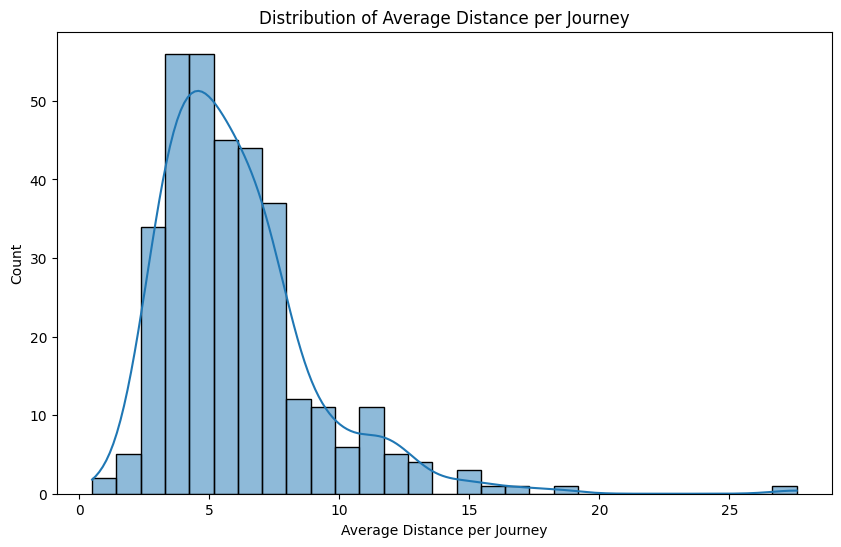

In [16]:
# Distribution of average distance per journey
plt.figure(figsize=(10, 6))
sns.histplot(df['average_distance_per_journey'], kde=True)
plt.title('Distribution of Average Distance per Journey')
plt.xlabel('Average Distance per Journey')
plt.ylabel('Count')
plt.show()

### Relationship Analysis

#### Age and Driver Score Correlation
There appears to be a correlation between age and driver score:
1. Younger drivers (17-20) tend to have better average scores, often in the 80s and low 90s.
2. Older drivers (20-21) show a wider range of scores, from very low (62.36) to very high (98.35).

This suggests that age is a factor in driving behavior, but not the sole determinant.

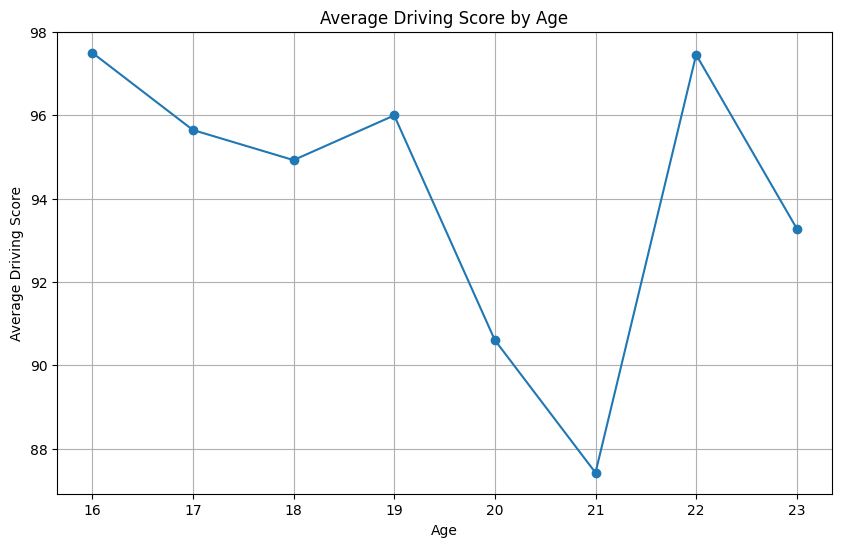

In [17]:
# Age vs Driving Score
age_score = df.groupby('Age')['DriverScore'].mean()
plt.figure(figsize=(10, 6))
plt.plot(age_score.index, age_score.values, marker='o')
plt.title('Average Driving Score by Age')
plt.xlabel('Age')
plt.ylabel('Average Driving Score')
plt.grid(True)
plt.show()

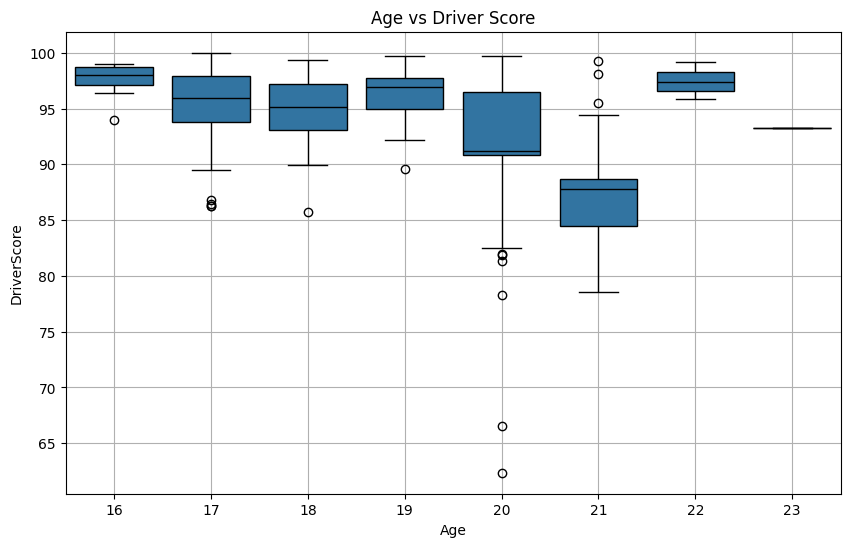

In [18]:
# Age vs Driver Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='DriverScore', data=df, linecolor='k')
plt.title('Age vs Driver Score')
plt.grid(True)
plt.show()

#### Months Since Inception and Driver Score Correlation
There appears to be a less to no correlation between the driver score and months since the policy has started, which does not make it a determinant factor.

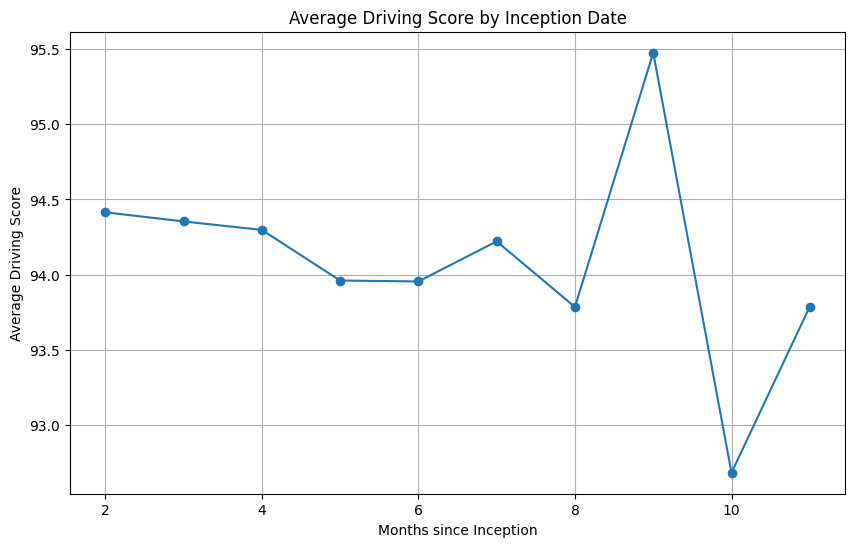

In [19]:
# Months since inception vs Driving Score
inception_score = df.groupby('Months since Inception')['DriverScore'].mean()
plt.figure(figsize=(10, 6))
plt.plot(inception_score.index, inception_score.values, marker='o')
plt.title('Average Driving Score by Inception Date')
plt.xlabel('Months since Inception')
plt.ylabel('Average Driving Score')
plt.grid(True)
plt.show()

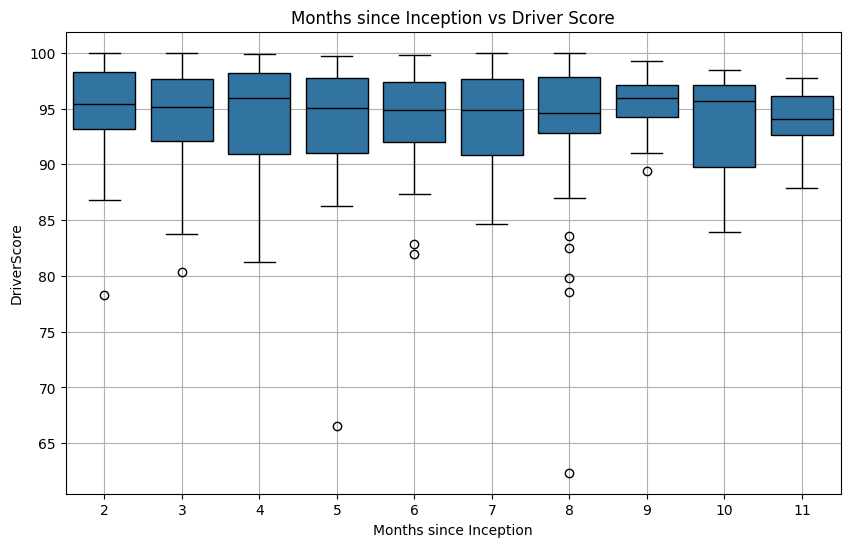

In [20]:
# Months since inception vs Driver Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Months since Inception', y='DriverScore', data=df, linecolor='k')
plt.title('Months since Inception vs Driver Score')
plt.grid(True)
plt.show()

#### Gender and Driver Score
1. Female drivers generally have slightly higher average scores compared to male drivers.
2. The lowest scores in the sample (62.36 and 78.58) belong to male drivers.

This indicates that gender might be a factor in risk assessment.

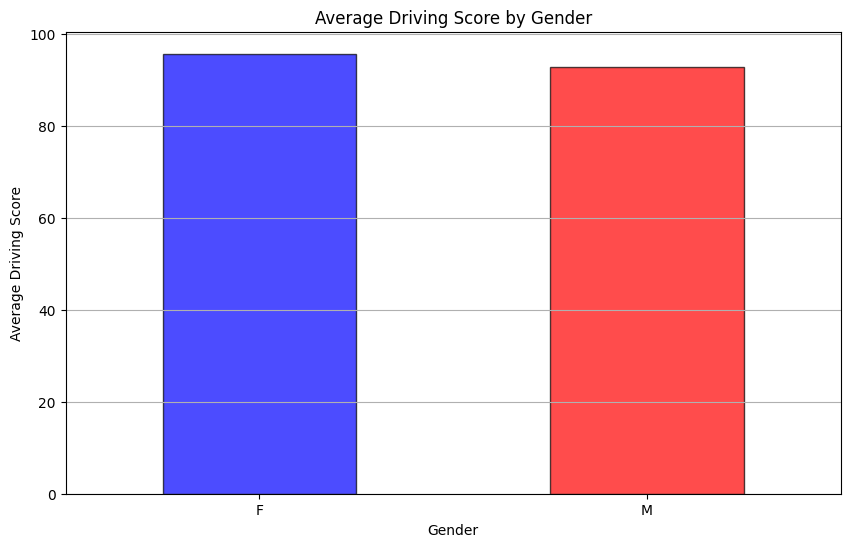

In [21]:
# Gender vs. Average Driver Score
gender_score = df.groupby('Gender')['DriverScore'].mean()
plt.figure(figsize=(10, 6))
gender_score.plot(kind='bar', color=['blue', 'red'], edgecolor='k', alpha=0.7)
plt.title('Average Driving Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Driving Score')
plt.xticks(rotation=0)
plt.grid(axis='y')

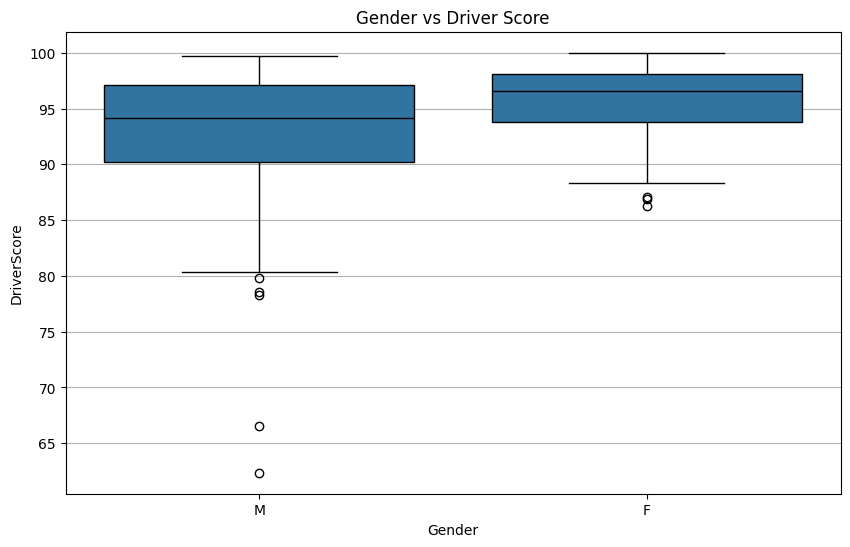

In [22]:
# Gender vs DriverScore
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='DriverScore', data=df, linecolor='k')
plt.title('Gender vs Driver Score')
plt.grid(axis='y')
plt.show()

#### Vehicle Type and Driver Score
Luxury and high-performance vehicles seem to correlate with lower driver scores:
1. BMW drivers frequently have lower scores, often in the 80s or even 70s.
2. Land Rover drivers also show a tendency towards lower scores.
3. Drivers of more common vehicles like Ford, Renault, and VW tend to have higher average scores.

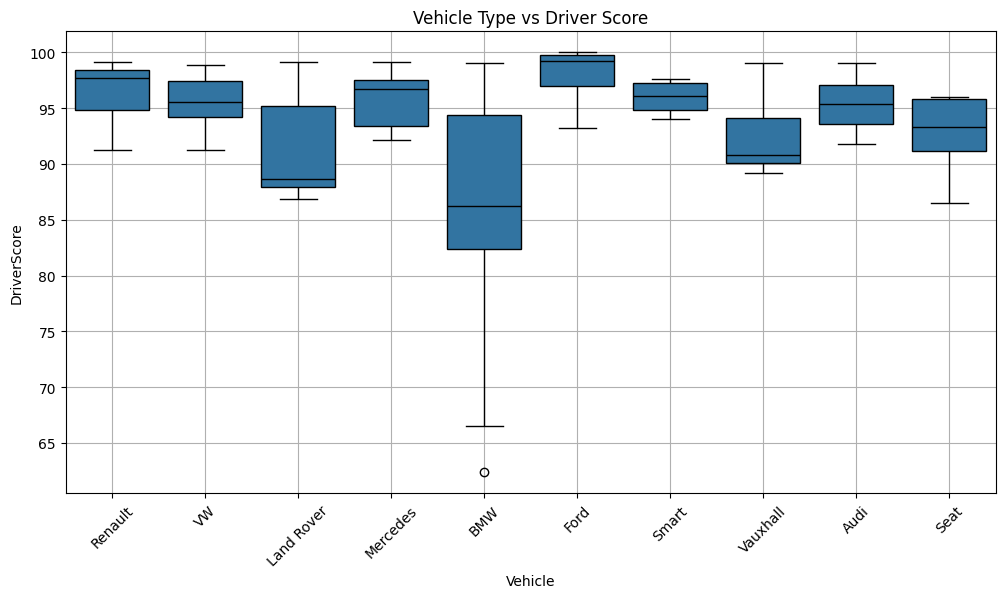

In [23]:
# Vehicle Type vs Driver Score
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle', y='DriverScore', data=df, linecolor='k')
plt.title('Vehicle Type vs Driver Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

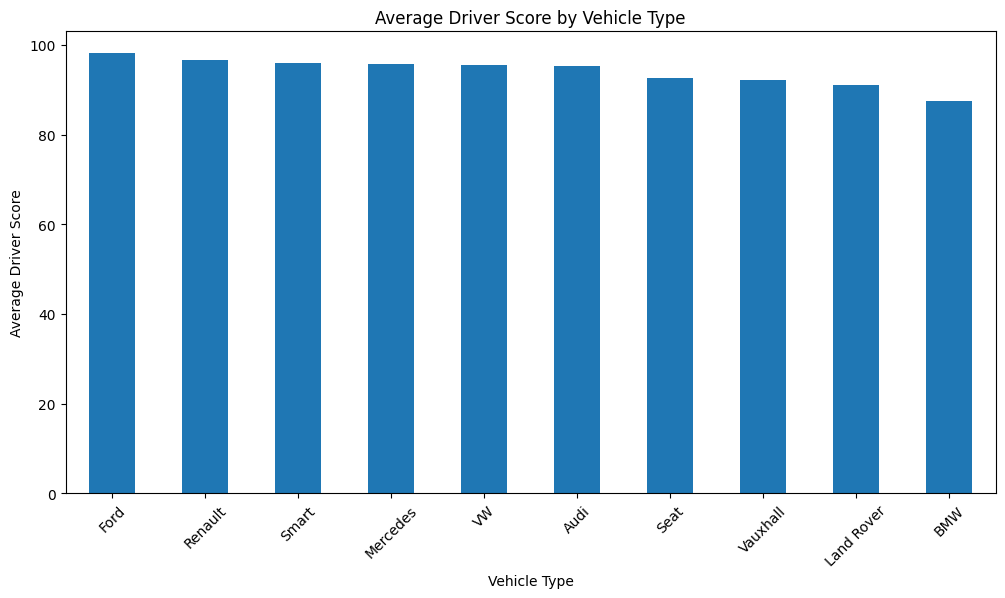

In [24]:
# Average Driver Score by Vehicle Type
avg_score_by_vehicle = df.groupby('Vehicle')['DriverScore'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_score_by_vehicle.plot(kind='bar')
plt.title('Average Driver Score by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Driver Score')
plt.xticks(rotation=45)
plt.show()

#### Vehicle Type and Premium Charged
Vehicle type doesn't seem to correlate with premium charged:
1. Luxury and high performance cars are charged less than some common cars but have a wider range compared to others.
2. Even the premium ranges differently for every car type.

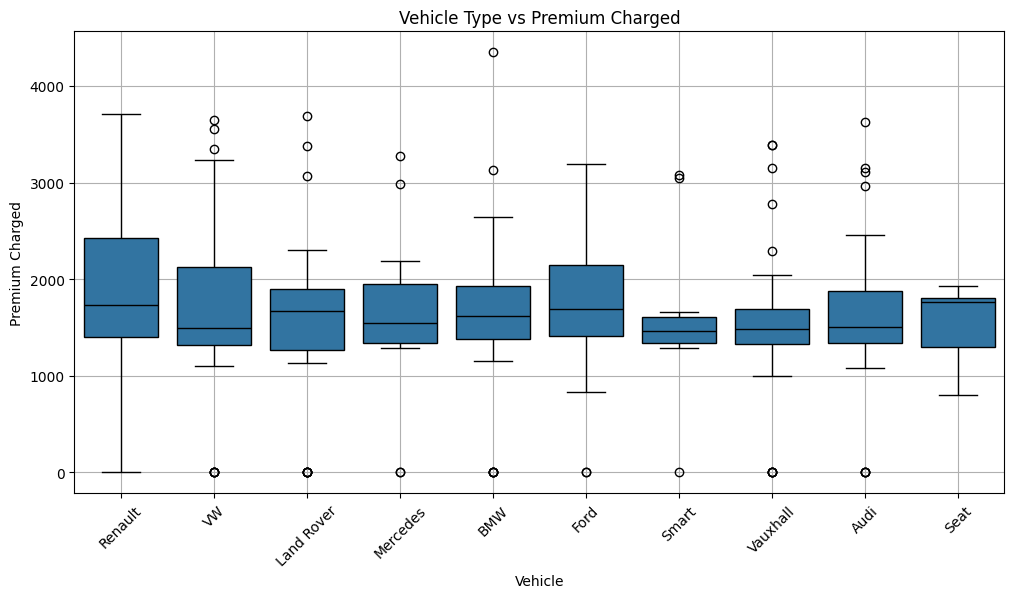

In [25]:
# Vehicle Type vs Premium Charged
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle', y='Premium Charged', data=df, linecolor='k')
plt.title('Vehicle Type vs Premium Charged')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

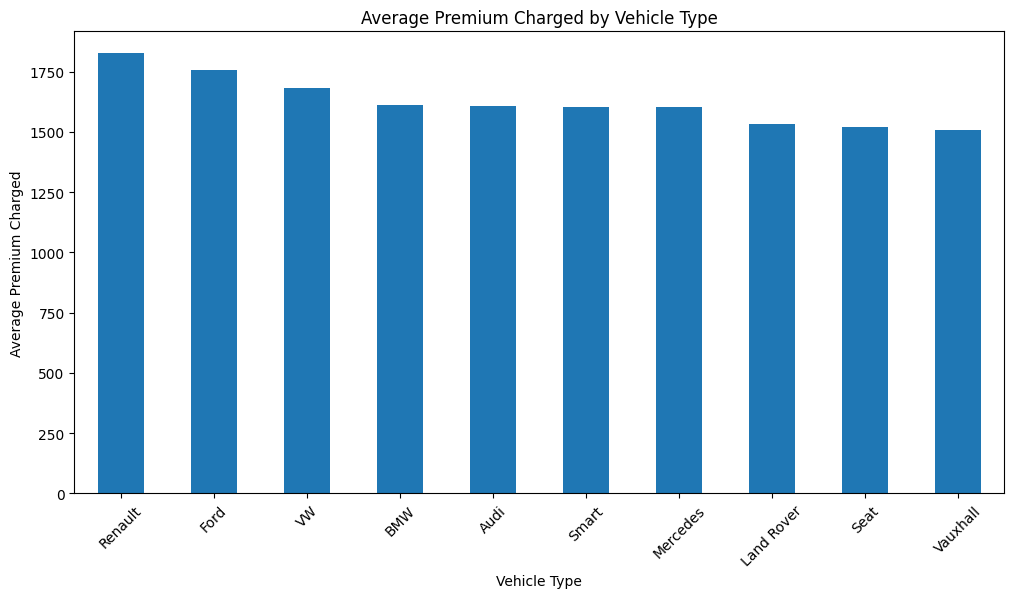

In [26]:
# Average Driver Score by Vehicle Type
avg_score_by_vehicle = df.groupby('Vehicle')['Premium Charged'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_score_by_vehicle.plot(kind='bar')
plt.title('Average Premium Charged by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Premium Charged')
plt.xticks(rotation=45)
plt.show()

#### Premium Pricing
1. Higher premiums are generally associated with younger drivers (17-19 years old).
2. Some policies show £0 premiums, which might indicate a special promotion or data entry issue.

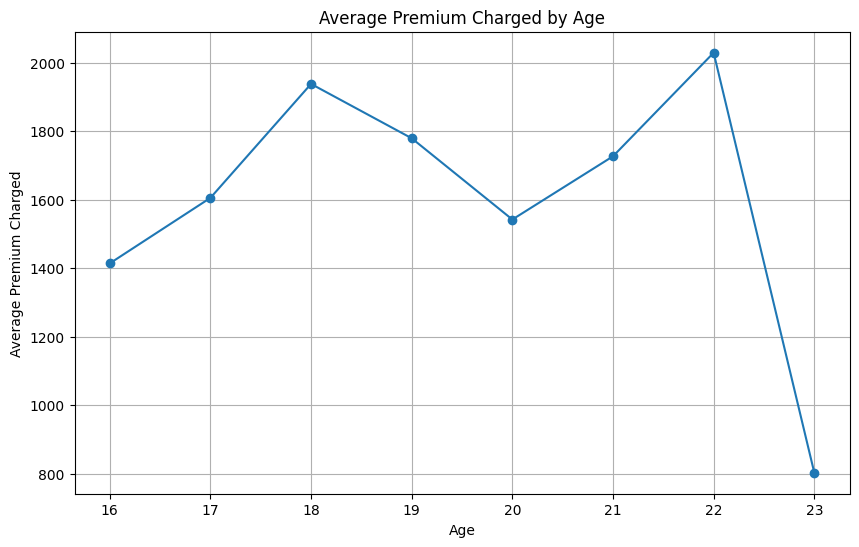

In [27]:
# Age vs Premium Charged
age_premium_score = df.groupby('Age')['Premium Charged'].mean()
plt.figure(figsize=(10, 6))
plt.plot(age_premium_score.index, age_premium_score.values, marker='o')
plt.title('Average Premium Charged by Age')
plt.xlabel('Age')
plt.ylabel('Average Premium Charged')
plt.grid(True)
plt.show()

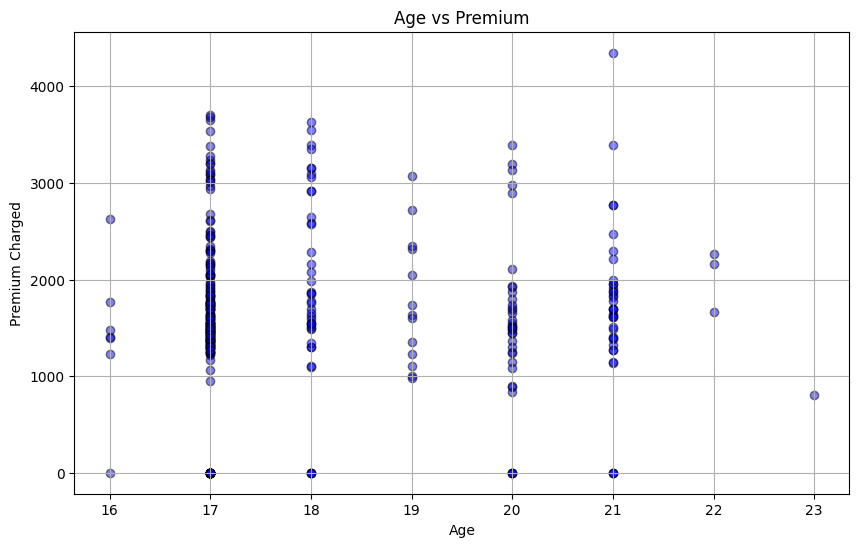

In [37]:
# Age vs Premium
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Premium Charged'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Age vs Premium')
plt.xlabel('Age')
plt.ylabel('Premium Charged')
plt.grid(True)
plt.show()

#### Premium Charged and Driver Score
There doesn't seem to be a strong correlation between the premium charged to the driver and the driving score


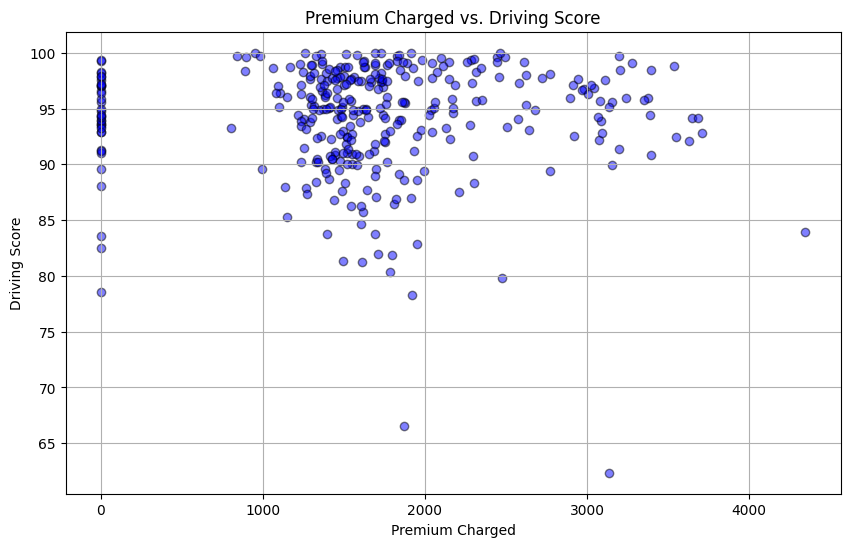

In [29]:
# Scatter plot of Premium Charged vs Driving Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Premium Charged'], df['DriverScore'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Premium Charged vs. Driving Score')
plt.xlabel('Premium Charged')
plt.ylabel('Driving Score')
plt.grid(True)

#### Distance travelled and Driver Score correlation
There doesn't appear to be a strong correlation between distance travelled and driver score. Both high and low mileage drivers can have good or poor scores.


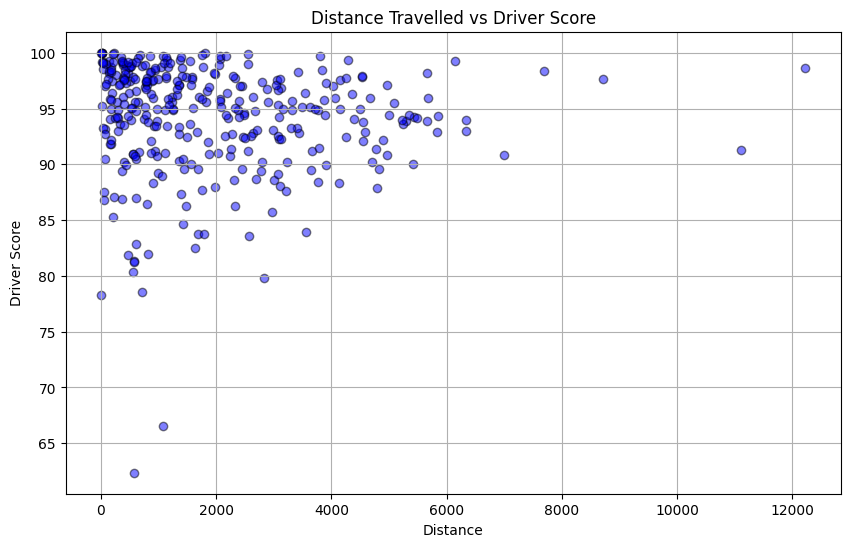

In [30]:
# Distance travelled vs Driver Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['DriverScore'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Distance Travelled vs Driver Score')
plt.xlabel('Distance')
plt.ylabel('Driver Score')
plt.grid(True)
plt.show()

#### Distance Travelled and Premium Charged
Again there doesn't appear to be a strong correlation between distance travelled and premium charged. Even tough most of the drivers with distance travelled less than 2000 miles fall in beween 1000-2000 in terms of premium charged, with only 335 entries this can't be a determinant factor. More data may generate a proper correlation.

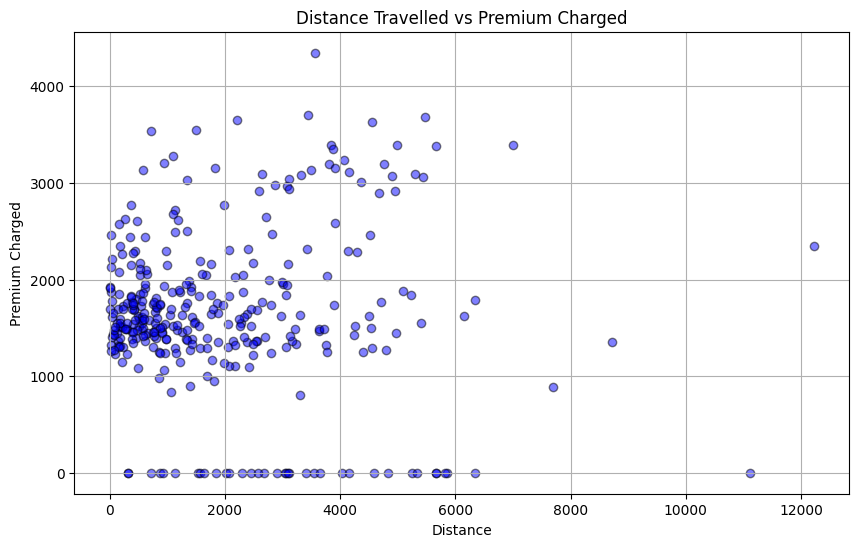

In [31]:
# Distance travelled vs Premium Charged
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Premium Charged'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Distance Travelled vs Premium Charged')
plt.xlabel('Distance')
plt.ylabel('Premium Charged')
plt.grid(True)
plt.show()

#### Risk Events
1. High-risk events are relatively rare, with many drivers having 0-5 such events.
2. Medium-risk events are more common but still relatively low for most drivers.
3. There's a clear correlation between the number of risk events and lower driver scores.


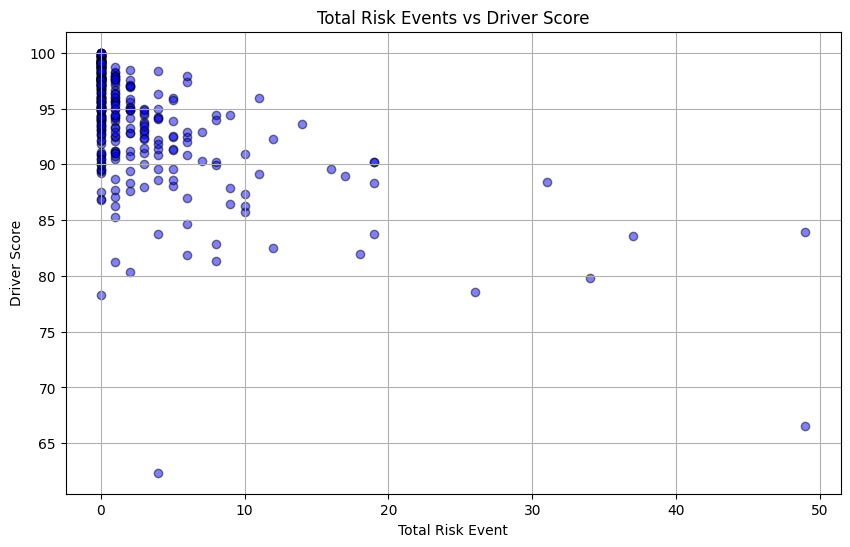

In [32]:
# High Risk Events vs Driver Score
plt.figure(figsize=(10, 6))
plt.scatter(df['High Risk Event'], df['DriverScore'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Total Risk Events vs Driver Score')
plt.xlabel('Total Risk Event')
plt.ylabel('Driver Score')
plt.grid(True)
plt.show()

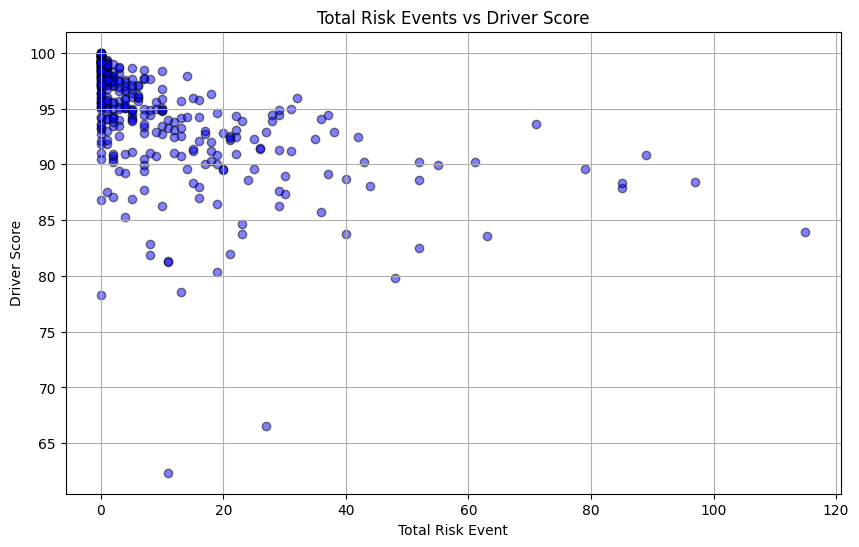

In [33]:
# Medium Risk Events vs Driver Score
plt.figure(figsize=(10, 6))
plt.scatter(df['Medium Risk Event'], df['DriverScore'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Total Risk Events vs Driver Score')
plt.xlabel('Total Risk Event')
plt.ylabel('Driver Score')
plt.grid(True)
plt.show()

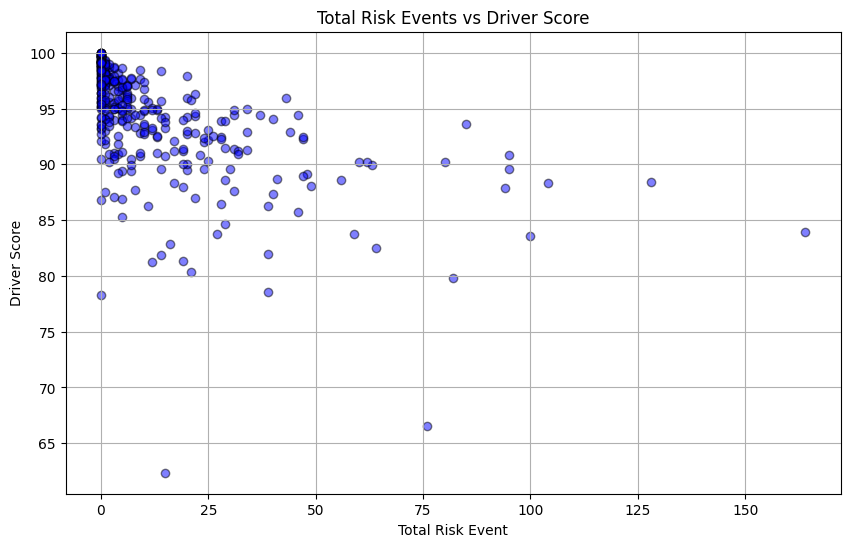

In [34]:
# Risk Events vs Driver Score
df['Total Risk Events'] = df['High Risk Event'] + df['Medium Risk Event']
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Risk Events'], df['DriverScore'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Total Risk Events vs Driver Score')
plt.xlabel('Total Risk Event')
plt.ylabel('Driver Score')
plt.grid(True)
plt.show()

#### Speeding Events
Speeding events per mile show a strong inverse correlation with driver scores. Drivers with higher rates of speeding events tend to have lower overall scores.

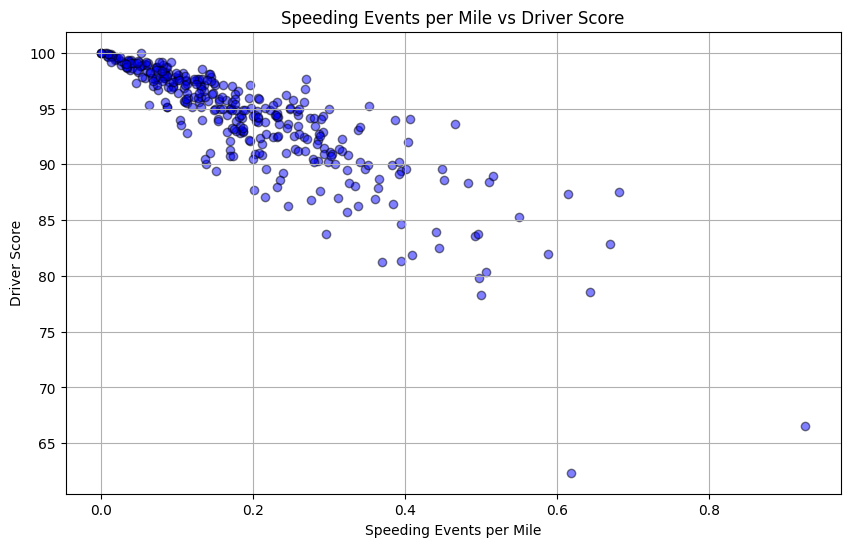

In [35]:
# Speeding Events per Mile vs Driver Score
df['Speeding Events per Mile'] = df['Speeding Events'] / df['Distance']
plt.figure(figsize=(10, 6))
plt.scatter(df['Speeding Events per Mile'], df['DriverScore'], alpha=0.5, c='blue', edgecolor='k')
plt.title('Speeding Events per Mile vs Driver Score')
plt.xlabel('Speeding Events per Mile')
plt.ylabel('Driver Score')
plt.grid(True)
plt.show()

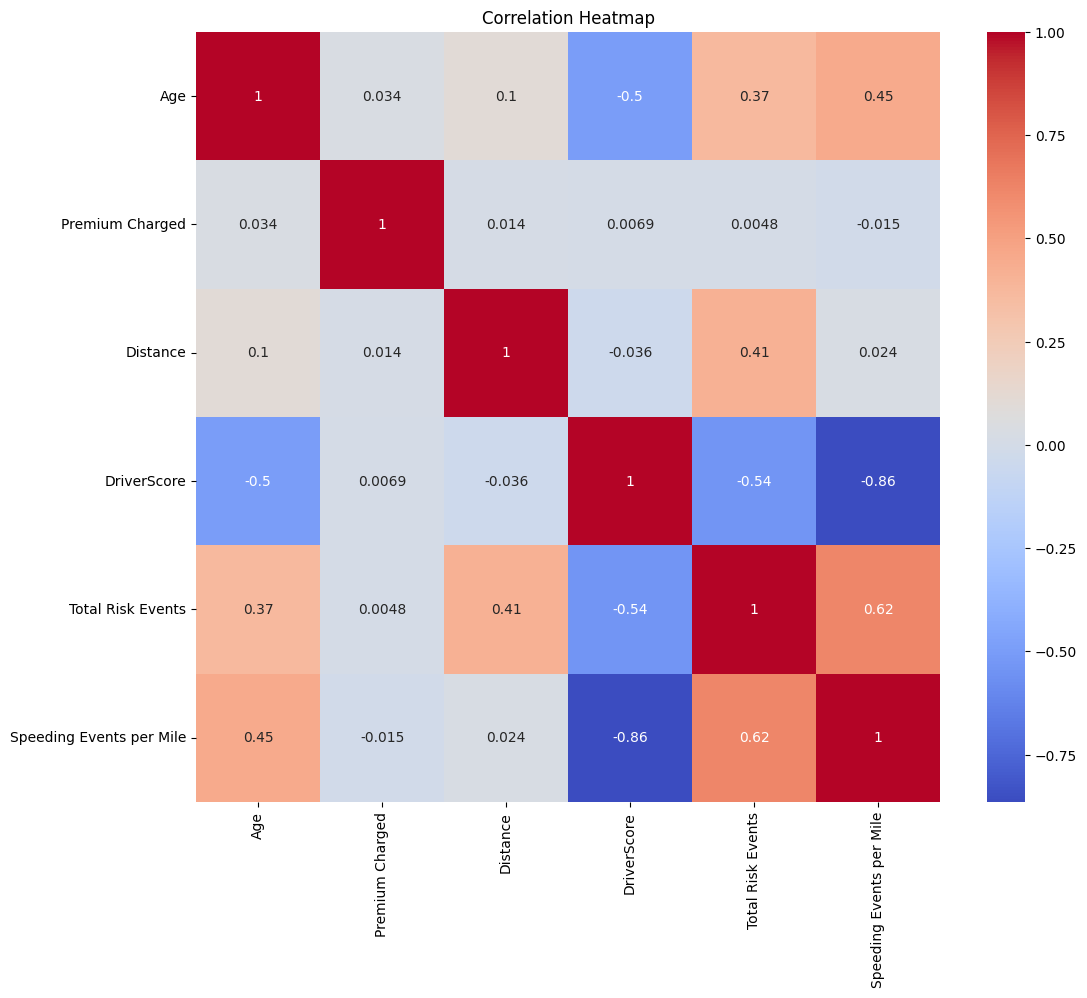

In [36]:
# Correlation heatmap
correlation_matrix = df[['Age', 'Premium Charged', 'Distance', 'DriverScore', 'Total Risk Events', 'Speeding Events per Mile']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Recommendations for Insurers
1. **Age-based pricing**: Continue to charge higher premiums for younger drivers, but consider individual driving scores for more personalized pricing.
2. **Vehicle-based risk assessment**: Pay special attention to drivers of luxury and high-performance vehicles, as they tend to have lower scores.
3. **Gender considerations**: While gender differences exist, they should be considered alongside other factors for fair pricing.
4. **Reward good behavior**: Implement a system to reward drivers with consistently high scores and low risk events.
5. **Speeding focus**: Develop targeted interventions or incentives to reduce speeding, as it strongly correlates with overall risk.
6. **Personalized pricing**: Use the driver score as a key factor in determining premiums, as it appears to be a good proxy for claim likelihood.
7. **Monitor high-risk drivers**: Implement additional monitoring or interventions for drivers with scores below a certain threshold (e.g., 85).